# **Tarea Ecualizacion y Modificacion de Histograma**

***Nombre del Grupo:*** Nosotros

***Integrantes:*** Azul Barracchia, Mario Sigal Aguirre, Lautaro Masetto, Leonardo Dominguez

❗❗❗❗ ***Recuerden subir la carpeta `imagenes` antes de correr el codigo. Las imagenes se encuentran en la entrega*** ❗❗❗❗

El **histograma** de una imagen es una representación gráfica de la distribución de los valores de intensidad de píxeles en ella abstrayendola de su contenido, por lo que nos permite analizar y modificar las características visuales de la imagen sin alterarlo. Gracias a esta propiedad, el histograma se convierte en una herramienta poderosa para mejorar las imágenes de manera de poco invasiva pero efectiva.

## **Importancia del Histograma**

El histograma proporciona una **"silueta"** de la distribución de los valores de gris de la imagen, lo que nos da información sobre las características visuales de la misma. Por ejemplo:

- **Imagen oscura:** Si el histograma se concentra en el lado izquierdo, la imagen tiene predominancia de tonos oscuros.
- **Imagen brillante:** Si el histograma se concentra en el lado derecho, la imagen está dominada por tonos claros.
- **Poco contraste:** Un histograma concentrado en un rango estrecho de valores indica una imagen con bajo contraste.
- **Buen contraste:** Un histograma distribuido de manera más uniforme sugiere una imagen con un buen rango de intensidades y, por lo tanto, un alto contraste visual.

En resumen, el histograma nos ofrece una **"sensación"** de la imagen, ya que nos permite entender de manera cuantitativa su iluminación, contraste y calidad visual.

## **Histograma como Distribución**

Si consideramos un histograma $H$ de una imagen $M$, podemos normalizarlo con respecto al número total de píxeles, lo que nos da la distribución de probabilidad $p_M$ de la **variable aleatoria** que representa los valores de gris en $M$. Matemáticamente, podemos expresar la **Función de Probabilidad Acumulada** $F_M(t)$ de la siguiente manera:

$F_M(t) = \sum_{i=0}^t p_M(t)$

Esta distribución es fundamental porque nos permite aplicar herramientas estadísticas para analizar y manipular imágenes.


***Ejemplo:***

In [ ]:
# Muestra una imagen junto con su histograma
def MostrarHistograma(axs, index, imagen, titulo):
  axs[index].imshow(imagen, cmap='gray', clim=(0,255))
  axs[index].set_title(titulo)
  axs[index].axis("off")

  axs[index+1].set_title(f"Histograma {titulo}")
  axs[index+1].grid(True)
  axs[index+1].hist(imagen.ravel(), bins=256, histtype='step', color='black')
  axs[index+1].axvline(x = 128, color = 'r')


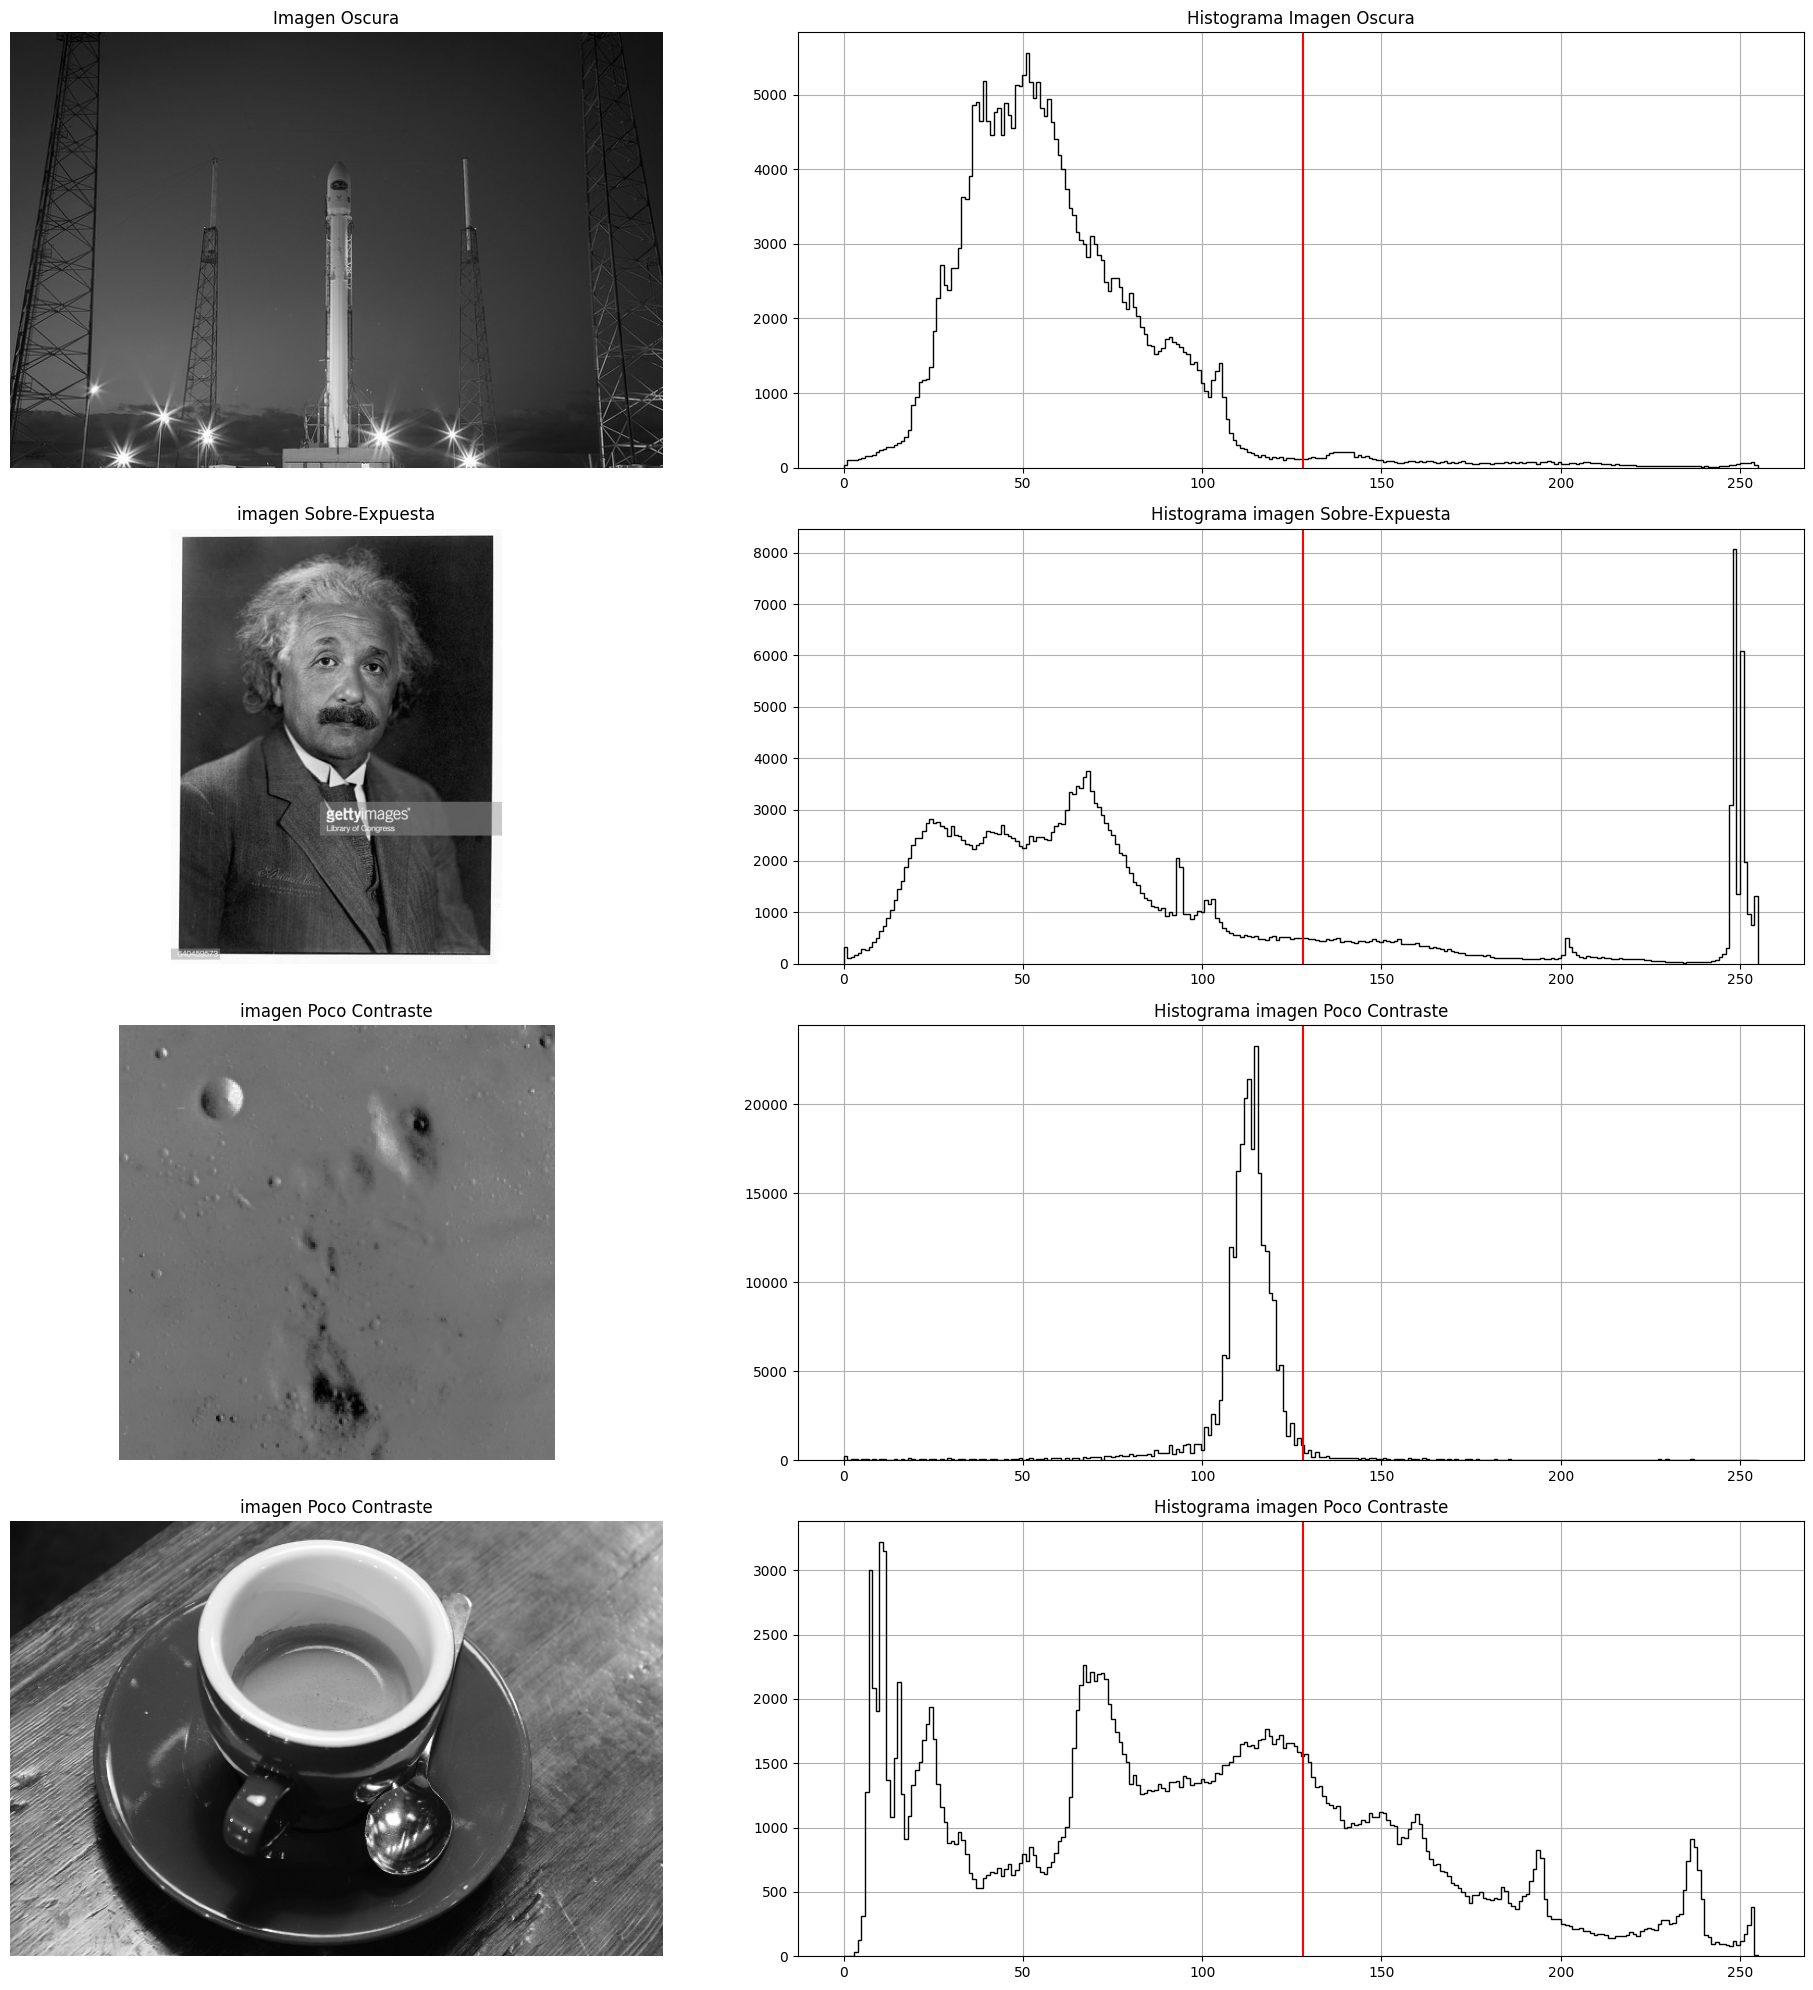

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,color, util, io

# Abrimos imagenes de distinto tipo
imagenOscura = util.img_as_ubyte((color.rgb2gray(data.rocket())))
imagenSobreExpuesta = util.img_as_ubyte(io.imread("/content/imagenes/einstein.jpg", as_gray=True))
imagenPocoContraste = data.moon()
imagenContraste = util.img_as_ubyte((color.rgb2gray(data.coffee())))

# Mostramos el resultado de la transformacion
fig, axs = plt.subplots(4,2, figsize=(20,20))
axs = axs.ravel()

# Mostramos como se ve cada uno de sus histogramas
MostrarHistograma(axs, 0, imagenOscura, "Imagen Oscura")
MostrarHistograma(axs, 2, imagenSobreExpuesta, "imagen Sobre-Expuesta")
MostrarHistograma(axs, 4, imagenPocoContraste, "imagen Poco Contraste")
MostrarHistograma(axs, 6, imagenContraste, "imagen Poco Contraste")

plt.tight_layout()
plt.show()

## 1. **Ecualización del Histograma**

Como hemos visto, las imágenes con poco contraste suelen tener un histograma concentrado en un rango pequeño de valores. Las imágenes con un histograma más uniforme suelen tener una mejor apariencia visual, ya que presentan un contraste más equilibrado.

La **ecualización del histograma** es una técnica que busca mejorar el contraste de una imagen, transformando su histograma para que se distribuya lo más uniformemente posible. La idea es "expandir" el rango de valores de la imagen para aprovechar mejor todo el espectro de intensidades de gris disponible.

### **Procedimiento**

La transformación que aplicamos sobre los niveles de gris en el proceso de ecualización se define de la siguiente forma:

$$T[n] = F_M(n)$$

Donde $F_M(n)$ es la función de probabilidad acumulada de la imagen de entrada $M$, y $T[n]$ es el nuevo valor de gris transformado para $n$

Para esta tarea haremos una modificacion a la formula para independizar el histograma a ecualizar de la imagen, es decir:

$$T[n] = F_H(n)$$

Donde $F_H$ sera la funcion de probabilidad acumulada relacionada a un Histograma $H$.



#### ***Consigna Implementacion***:
Implementar la funcion `calcularProbabilidadAcumulada` y el algoritmo de `Ecualización del Histograma`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, exposure

# Funcion que dada una imagen, devuelve su funcion de probabilidad
def distribucionImagen(imagen):
  # Utilizando density=True, np realiza la normalizacion sobre la cantidad de
  # pixels automaticamente
  return np.histogram(imagen.ravel(), bins=256, range=(0,255), density=True)[0]

# Funcion que dada una distribucion y un nivel de gris, calcula la Pr(x <= nivelGris)
def calcularProbabilidadAcumulada(distribucion, nivelGris):
  suma = 0
  for i in range(nivelGris):
    suma += distribucion[i]
  return min(suma, 1.0)

def crearGraficoSumAcumulada(distribucion):
  suma = np.zeros(distribucion.size)
  for i in range(256):
    suma[i] = calcularProbabilidadAcumulada(distribucion, i)
  return suma

def mostrarDistribucion(axs, index, imagen, titulo):
  distribucion = distribucionImagen(imagen)
  axs[index].set_title(f"Distribucion {titulo}")
  axs[index].grid(True)
  axs[index].bar(range(0,256), distribucion, width=1, color='black')

  axs[index+1].set_title(f"Suma acumulada {titulo}")
  axs[index+1].grid(True)
  axs[index+1].plot(range(0,256),crearGraficoSumAcumulada(distribucion), color='black', label=f"Suma Acum. {titulo}")
  axs[index+1].plot([0, 255], [0, 1], color='orange', label=f"Suma Acum. Uniforme")
  axs[index+1].legend()

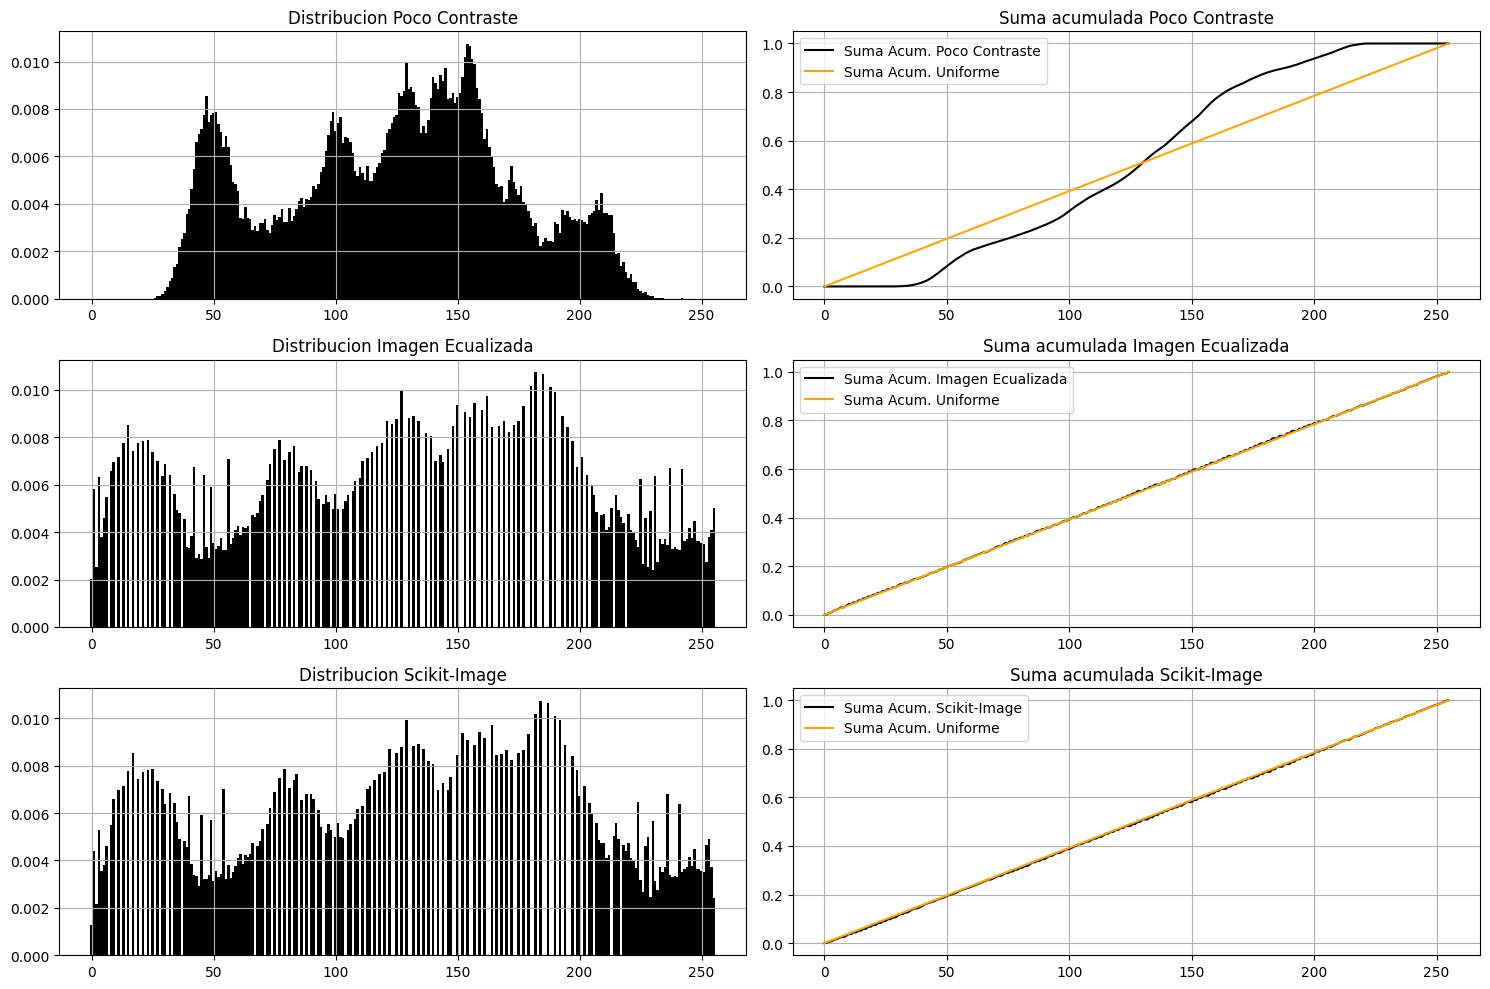

In [ ]:
#Dada una imagen y un histograma relativo , transforma la imagen segun la ecualizacion del histograma H.
def ecualizarImagen(imagen, histogramaH):

  # Conviene pasar la imagen a tipo float para guardar los valores de la transformacion
  # Recuerden que la transformacion es sobre los niveles de gris de la imagen original
  imagenEcualizada = util.img_as_float64(imagen.copy())
  distribucion = distribucionImagen(imagen)
  for i in range(imagenEcualizada.shape[0]):
    for j in range(imagenEcualizada.shape[1]):
      imagenEcualizada[i,j] = calcularProbabilidadAcumulada(histogramaH, imagen[i,j])
  return util.img_as_ubyte(imagenEcualizada)

# Abrimos una imagen con poco contraste
imagenPocoContraste = util.img_as_ubyte(io.imread("/content/imagenes/lena_gray_256.tif", as_gray=True))

# Aplicamos sobre ella ecualizacion, tanto nuestro algoritmo como el de Scikit-Image como referencia
# Ecualizamos la imagen utilizando su propio histograma para conseguir su version ecualizada.
imagenEcualizada = ecualizarImagen(imagenPocoContraste, distribucionImagen(imagenPocoContraste))
imagenEcualizada_Scikit = util.img_as_ubyte(exposure.equalize_hist(imagenPocoContraste))

fig, axs = plt.subplots(3,2, figsize=(15,10))
axs = axs.ravel()

mostrarDistribucion(axs, 0, imagenPocoContraste, "Poco Contraste")
mostrarDistribucion(axs, 2, imagenEcualizada, "Imagen Ecualizada")
mostrarDistribucion(axs, 4, imagenEcualizada_Scikit, "Scikit-Image")

plt.tight_layout()
plt.show()

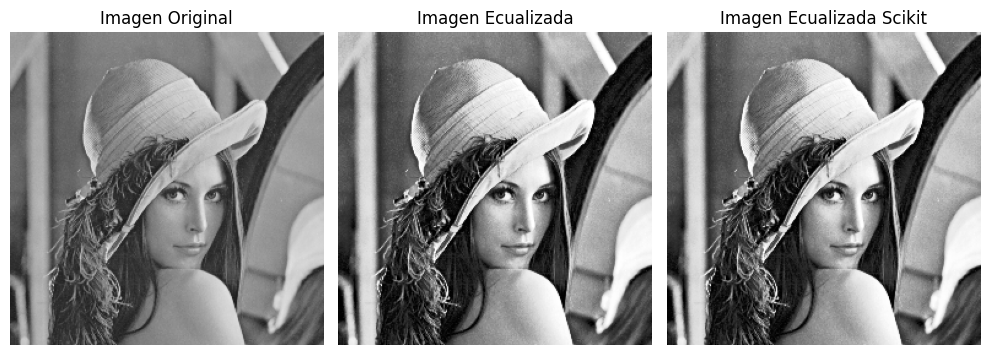

In [ ]:
#Mostramos el resultados de la ecualizacion sobre la imagen
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs = axs.ravel()

axs[0].imshow(imagenPocoContraste, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenEcualizada, cmap='gray', clim=(0,255))
axs[1].set_title("Imagen Ecualizada")
axs[1].axis("off")

axs[2].imshow(imagenEcualizada_Scikit, cmap='gray', clim=(0,255))
axs[2].set_title("Imagen Ecualizada Scikit")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## 2. **A Histogram Modification Framework and Its Application for Image Contrast Enhancement**

Aunque la **ecualización de histograma** es una herramienta flexible y eficiente para mejorar el contraste de las imágenes, en algunas ocasiones el resultado puede parecer **poco natural**. Esto se debe principalmente a los **grandes saltos** que ocurren entre los valores de los píxeles transformados $T[n]$ y $T[n+1]$. Estos saltos se vuelven más pronunciados a medida que aumenta el contraste en la imagen original, lo que puede dar lugar a una apariencia artificial.

El artículo **"A Histogram Modification Framework and Its Application for Image Contrast Enhancement"** propone un conjunto de técnicas que buscan mejorar los resultados de la ecualización de histograma, minimizando los efectos negativos de estos saltos abruptos. Estas técnicas están diseñadas para producir una imagen final más **suave** y **natural**, controlando el **peso** de la transformación mediante parámetros de regularización.

para esta Tarea nos concentraremos en 3 tecnicas mencionadas: `Adjustable Histogram Equalization`, `Histogram Smoothing`, `Black and White Stretching`.




#### ***Ejemplo:***


Mapeo de Nivel 78: 163
Mapeo de Nivel 79: 165



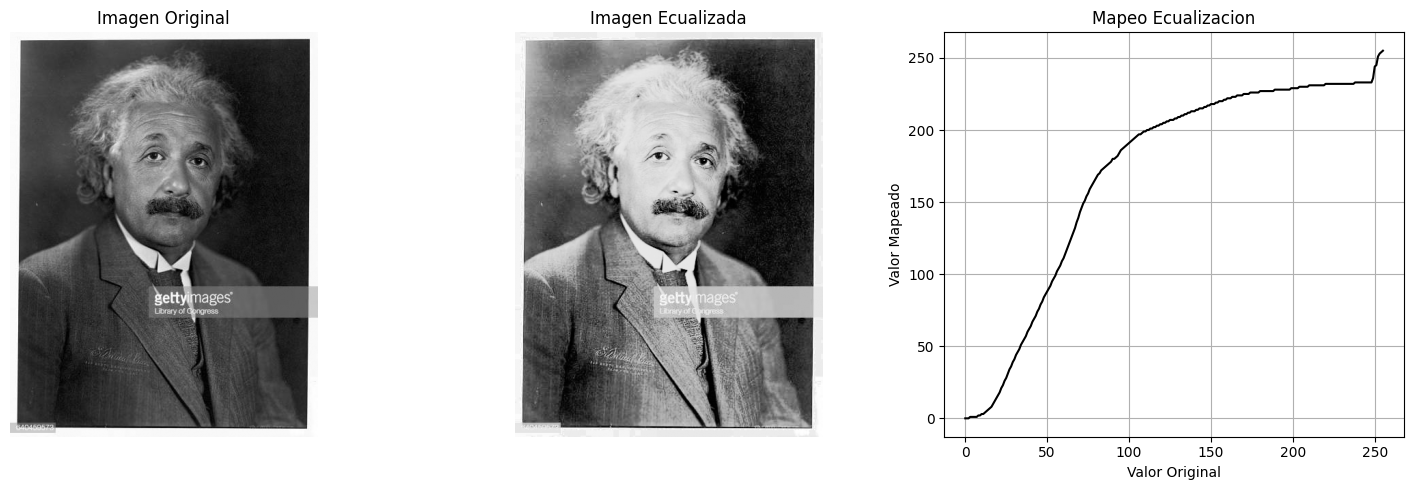

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, exposure, data

# Creamos el mapeo entre el valor de gris original y como sera al ecualizar la imagen
def crearMapeoEcualizado(distribucion):
  mapeo = np.zeros(256)
  for i in range(256):
    mapeo[i] = calcularProbabilidadAcumulada(distribucion, i)
  return util.img_as_ubyte(mapeo)

# Obtenemos una imagen con poco contraste y la ecualizamos
imagenPocoContraste = util.img_as_ubyte(io.imread("/content/imagenes/einstein.jpg", as_gray=True))
imagenEcualizada =  ecualizarImagen(imagenPocoContraste, distribucionImagen(imagenPocoContraste))

# Por otro lado obtenemos el mapeo de la ecualizacion
distribucionPocoContraste = distribucionImagen(imagenPocoContraste)
mapeoEcualizacion = crearMapeoEcualizado(distribucionPocoContraste)

# Vemos la diferencia que existe entre valores continuos en el mapeo
print()
print(f"Mapeo de Nivel 78: {mapeoEcualizacion[78]}")
print(f"Mapeo de Nivel 79: {mapeoEcualizacion[79]}")
print()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs = axs.ravel()

axs[0].imshow(imagenPocoContraste, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenEcualizada, cmap='gray', clim=(0,255))
axs[1].set_title("Imagen Ecualizada")
axs[1].axis("off")

axs[2].set_title(f"Mapeo Ecualizacion")
axs[2].grid(True)
axs[2].plot(range(0,256),mapeoEcualizacion, color='black')
axs[2].set_xlabel("Valor Original")
axs[2].set_ylabel("Valor Mapeado")


plt.tight_layout()
plt.show()



### 1. **Adjustable Histogram Equalization (AHE)**

La técnica de **Adjustable Histogram Equalization (AHE)** es una extensión de la ecualización de histograma tradicional, que permite **controlar el grado de ajuste** realizado sobre la imagen. A diferencia de la ecualización estándar, que tiende a generar grandes cambios abruptos en los valores de los píxeles, la **AHE** permite ajustar la intensidad de la transformación en función de un parámetro de ajuste, lo que resulta en una mayor flexibilidad y control sobre el contraste final de la imagen.

### **Procedimiento**

El procedimiento de la **AHE** se basa en resolver el siguiente problema de optimización:

$$ h = \arg \min_h \left( |h - h_i| + \lambda |h - u| \right) $$

Donde:

- **$h$** es el histograma que buscamos obtener para ecualización y luego utilizar para especificar la imagen original.
- **$h_i$** es el histograma de entrada de la imagen original.
- **$u$** es el histograma uniforme.
- **$\lambda$** es el parámetro de ajuste que regula la **fuerza** de la transformación. Un valor mayor de **$\lambda$** hace que la imagen final se acerque más al histograma uniforme, mientras que un valor menor permite una mayor preservación de la imagen original.

####***Consigna***:

- Expliquen el fundamento teórico detrás de la técnica de **Adjustable Histogram Equalization (AHE)**.

- ¿Qué es lo que busca resolver el problema de optimización planteado en esta técnica? Analiza cómo funciona el parámetro **$\lambda$** y cómo influye en el balance entre preservar el histograma original de la imagen y acercarse a un histograma uniforme.

- ¿Por qué esta técnica mejora el contraste de las imágenes de manera más natural en comparación con la ecualización de histograma estándar? Justifica cómo y por qué este enfoque es efectivo para obtener resultados visualmente más equilibrados.

####***Respuesta***:

La tecnica **AHE** se basa en buscar un histograma modificado $h$, cercano al histograma de la imagen original $h_i$ (para preservar las caracteristicas de la imagen) y tambien cercano al histograma uniforme $u$ (para mejorar el contraste). Lo que se traduce en un problema de optimización donde se minimiza la suma de estas dos diferencias:

$$ h = \arg \min_h \left( |h - h_i| + \lambda |h - u| \right) $$

Luego este historama modidicado se utiliza para hacer la ecualización.

$\lambda$ es un parametro del problema que puede variar entre $[0,\infty)$. Cuando $\lambda = 0$, el histograma modificado coincide con el original ($h = h_i$). Entonces al aplicar la ecualización con ese histograma, se obtiene el mismo resultado que el método **HE** estándar. En cambio, cuando $\lambda$ toma valores muy altos, el histograma modificado se aproxima al uniforme ($h≈u$). Por lo tanto, al hacer la ecualización se obtendrá una imagen muy similar a la original (puesto que un histograma uniforme genera una transformación identidad $T[n]=n$).

La tecnica **HE** encuentra una imagen con un histograma que tenga una distribución acumulada lo mas cercana posible a la distribución acumulada de una variable aleatroria uniforme. Esto lo hace con el fin de aprovechar al maximo el rango dinámico, pero esta no es siempre la mejór estrategia a llevar a cabo, muchas veces las imagenes quedan con un aspecto poco natural. Para solucionar esto el metodo **AHE** modifica el histograma de entrada para que el resultado sea mas cercano a la imagen original, sin perder su potencial para mejorar el contraste. Esto lo hace, no fuerzando al histograma a ser totalmente uniforme, sino que encuantra un punto intermedio adaptable segun un parametro $\lambda$ que ajusta el nivel de ecualización. Lo cual permite un mayor factor de personalización para las imagenes por parte del usuario.




#### ***Consigna Implementacion***:

Implementen el algoritmo de **Adjustable Histogram Equalization (AHE)**

In [ ]:
def mostrarImagenConDistribucion(axs, index, imagen, titulo):
  distribucion = distribucionImagen(imagen)

  axs[index].imshow(imagen, cmap='gray', clim=(0,255))
  axs[index].set_title(titulo)
  axs[index].axis("off")

  axs[index+1].set_title(f"Distribucion {titulo}")
  axs[index+1].grid(True)
  axs[index+1].bar(range(0,256), distribucion, width=1, color='black')

  axs[index+2].set_title(f"Suma acumulada {titulo}")
  axs[index+2].grid(True)
  axs[index+2].plot(range(0,256),crearGraficoSumAcumulada(distribucion), color='black', label=f"Suma Acum. {titulo}")

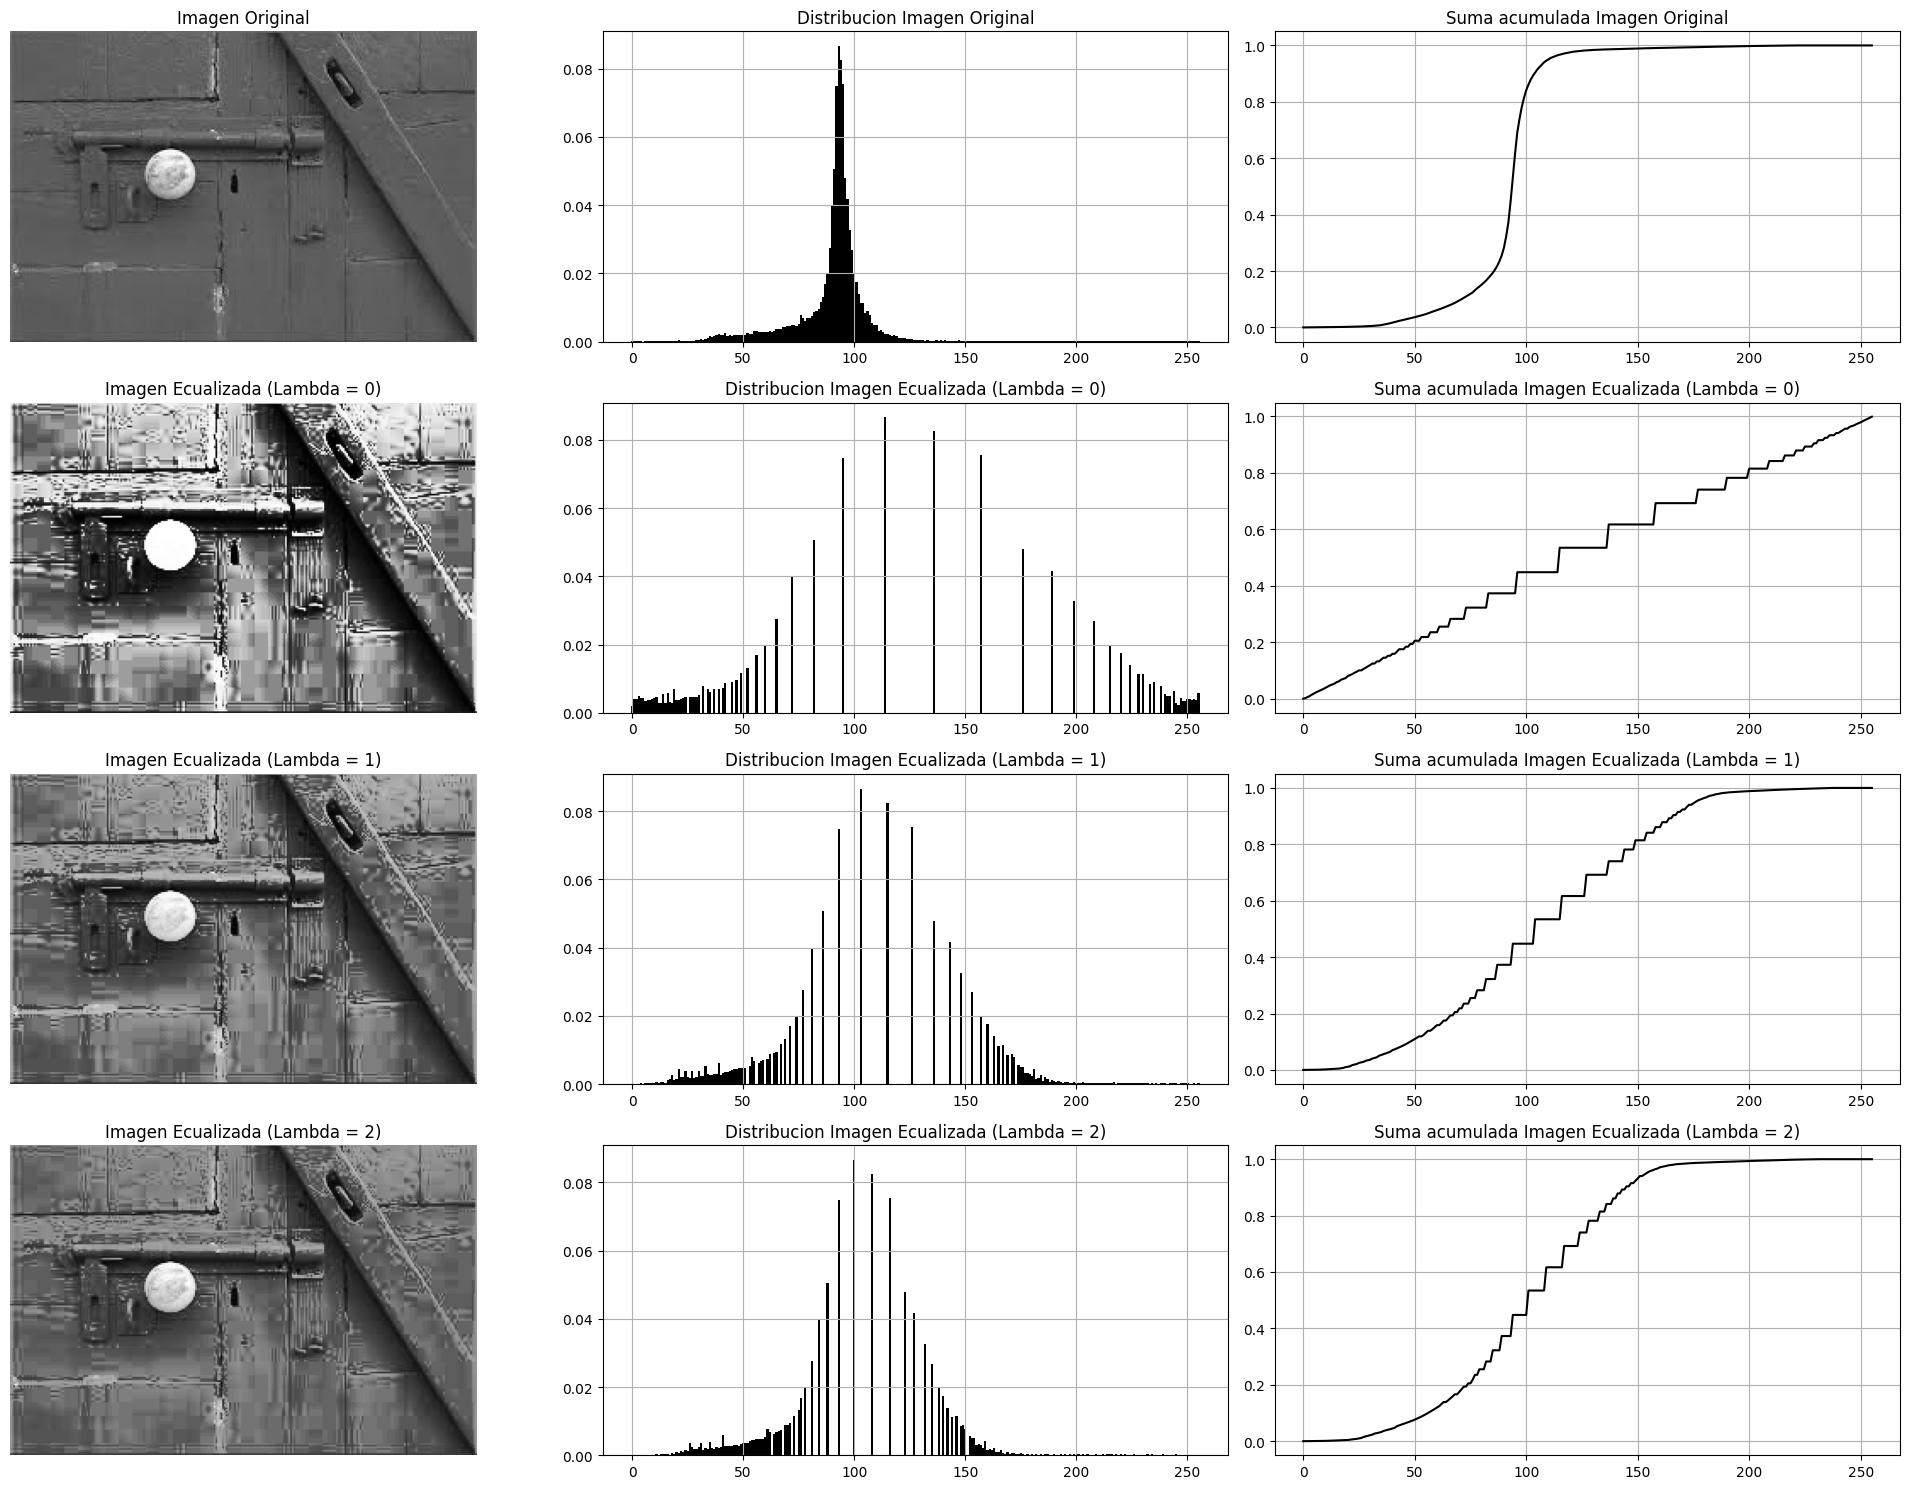

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, exposure, data

# Devuelve una Distribucion uniforme
def distribucionUniforme():
  return np.zeros(256) + 1.0/256.0

def ecualizacionAjustable(imagen, lambdaArg):
  u = distribucionUniforme()
  hi = distribucionImagen(imagen)
  h = (1/(1 + lambdaArg))*hi + (lambdaArg/(1+lambdaArg))*u
  imagenEcualizada = ecualizarImagen(imagen.copy(), h)
  return imagenEcualizada


imagenPocoContraste = util.img_as_ubyte(io.imread("/content/imagenes/door.jpeg", as_gray=True))
imagenEcualizadaLabmda_0 =  ecualizacionAjustable(imagenPocoContraste, 0)
imagenEcualizadaLabmda_1 =  ecualizacionAjustable(imagenPocoContraste, 1)
imagenEcualizadaLabmda_2 =  ecualizacionAjustable(imagenPocoContraste, 2)

fig, axs = plt.subplots(4,3, figsize=(20,15))
axs = axs.ravel()

mostrarImagenConDistribucion(axs, 0, imagenPocoContraste, "Imagen Original")
mostrarImagenConDistribucion(axs, 3, imagenEcualizadaLabmda_0, "Imagen Ecualizada (Lambda = 0)")
mostrarImagenConDistribucion(axs, 6, imagenEcualizadaLabmda_1, "Imagen Ecualizada (Lambda = 1)")
mostrarImagenConDistribucion(axs, 9, imagenEcualizadaLabmda_2, "Imagen Ecualizada (Lambda = 2)")

plt.tight_layout()
plt.show()

### 2. **Histogram Smoothing**

El **suavizado de histograma** tiene como objetivo reducir la **rugosidad** o los **saltos abruptos** que pueden surgir en el histograma después de la ecualización. Estos saltos pueden resultar en una imagen con transiciones bruscas entre los niveles de gris, lo que puede producir un contraste poco natural. El suavizado se aplica para minimizar estas discontinuidades, logrando una **transición más suave** entre los valores de intensidad y, por lo tanto, un contraste más equilibrado y natural.

### **Procedimiento**

El proceso de suavizado de histograma se basa en la resolución de un problema de optimización, que balancea tres factores clave:

$$ h = \arg \min_h \left( |h - h_i| + \lambda |h - u| + \gamma |Dh| \right) $$

Donde:

- **$h$** es el histograma que buscamos obtener para ecualizar y luego utilizarlo para especificar en la imagen de entrada.
- **$h_i$** es el histograma de la imagen original.
- **$u$** es el histograma uniforme.
- **$D$** es la **matriz de diferencias**.
- **$\lambda$** es el parámetro de ajuste que regula el **compromiso** entre preservar el histograma original y aproximarse a un histograma uniforme. Un valor mayor de **$\lambda$** favorece la transformación hacia el histograma uniforme, mientras que un valor menor preserva más las características originales de la imagen.
- **$\gamma$** es el parámetro que controla la **suavidad** del histograma. Un valor mayor de **$\gamma$** produce una imagen con transiciones más suaves y menos abruptas, lo que da lugar a un contraste más natural, mientras que un valor bajo permite que el histograma tenga una estructura más rígida y menos suavizada.


#### ***Consigna:***
- Explicar el fundamento teórico detrás de la adición del término **$D$** al problema de optimización en la técnica de **Histogram Smoothing**.
- ¿Qué objetivo se busca al incorporar este término en el problema? Analizar cómo **$D$**, que representa la **matriz de diferencias**, afecta el proceso de minimización.

#### ***Respuesta***

La matriz de diferencias D es una matriz bidiagonal que al ser multiplicada por un histograma h tiene como fin ver las diferencias de frecuencias entre cada bin consecutivo. Es decir, permite cuantificar la variación local del histograma (podemos ver qué tan rápido cambian las intensidades de un nivel de gris al siguiente). Matematicamente es:

$$
\mathbf{D} = 
\begin{bmatrix} 
1 & -1 & 0 & \cdots & 0 \\ 
0 & 1 & -1 & \cdots & 0 \\ 
0 & 0 & 1 & \ddots & \vdots \\ 
\vdots & \vdots & \ddots & \ddots & -1 \\ 
0 & 0 & \cdots & 0 & 1 
\end{bmatrix}
\qquad
\mathbf{h} = 
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_255
\end{bmatrix}
\qquad
\mathbf{Dh} = 
\begin{bmatrix}
h_1 - h_0 \\
h_2 - h_1 \\
\vdots \\
h_{255} - h_{254}
\end{bmatrix}
$$


Al aplicar este nuevo parametro en conjunto a $\gamma$ en la función objetivo a minimizar, podemos disminuir esas diferencias. Para ello, al aumentar $\gamma$  se penaliza los saltos en la imagen (o sea diferencias de intensidades grandes), permitiendo asi que la diferencia sea un poco más gradual y que la función de distribución acumulada tengan una curva cada vez más suave.

Desde un punto de vista visual, los picos que podrían aparecer en una AHE debido a grandes diferencias entre pixeles con valores cercanos entre si ahora se atenuan, ya que ahora esos pixeles se mapean con niveles de intesidades de grises cercanas entre si. Permitiendo asi, que no exista ***'ringing artifact'*** (ruido en los bordes).

####***Consigna Implementacion***
Implementen el algoritmo de **Histogram Smoothing**

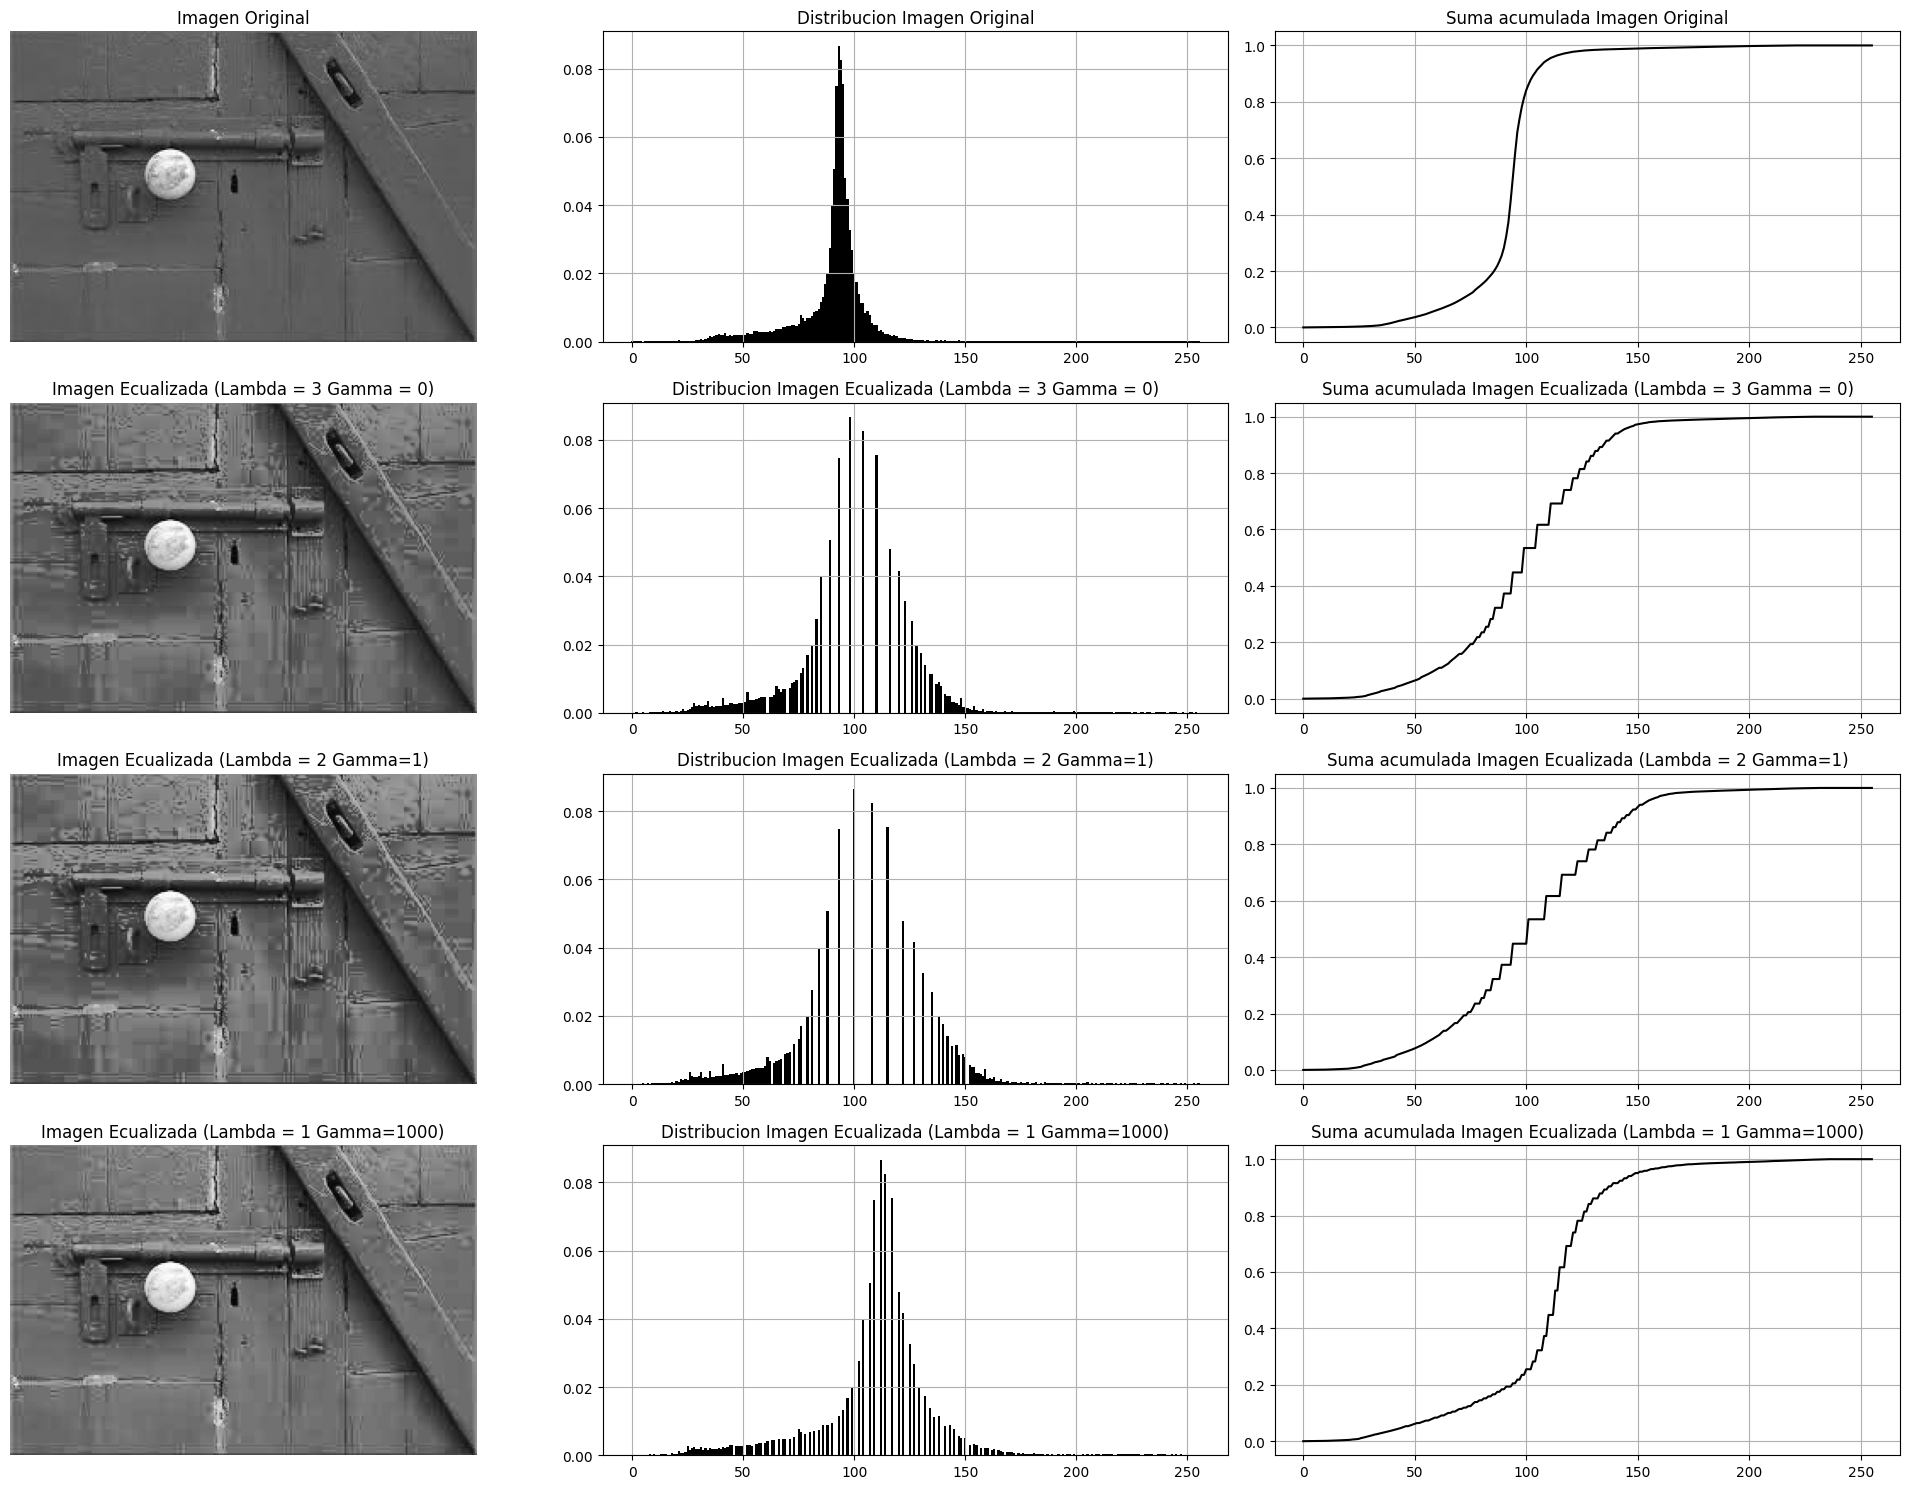

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, exposure, data

# Devuelve la matriz de diferencia
def matrizDiferencia():
  return (np.diag(np.zeros(256) - 1, 0) + np.diag(np.zeros(255) + 1, 1))[:-1,:]
def distribucionUniforme():
  return np.zeros(256) + 1.0/256.0

def suavizarHistograma(imagen, lambdaArg, gammaArg):
  #COMPLETAR
  u = distribucionUniforme()
  h0 = distribucionImagen(imagen)
  D = matrizDiferencia()
  I= np.eye(256)
  h_moño = np.linalg.inv((1 + lambdaArg)*I + gammaArg*np.transpose(D)@D)@(h0+lambdaArg*u)
  imagenEcualizada = ecualizarImagen(imagen.copy(), h_moño)
  return imagenEcualizada


# Devuelve una Distribucion uniforme


def ecualizacionAjustable(imagen, lambdaArg):



  imagenEcualizada = ecualizarImagen(imagen.copy(), h_moño)
  return imagenEcualizada




imagenPocoContraste = util.img_as_ubyte(io.imread("/content/imagenes/door.jpeg", as_gray=True))
imagenEcualizadaLambda_3 =  suavizarHistograma(imagenPocoContraste, 3, 0)
imagenEcualizadaGamma_1 = suavizarHistograma(imagenPocoContraste, 2, 1)
imagenEcualizadaGamma_1000 = suavizarHistograma(imagenPocoContraste, 1, 1000)

fig, axs = plt.subplots(4,3, figsize=(20,15))
axs = axs.ravel()


mostrarImagenConDistribucion(axs, 0, imagenPocoContraste, "Imagen Original")
mostrarImagenConDistribucion(axs, 3, imagenEcualizadaLambda_3, "Imagen Ecualizada (Lambda = 3 Gamma = 0)")
mostrarImagenConDistribucion(axs, 6, imagenEcualizadaGamma_1, "Imagen Ecualizada (Lambda = 2 Gamma=1)")
mostrarImagenConDistribucion(axs, 9, imagenEcualizadaGamma_1000, "Imagen Ecualizada (Lambda = 1 Gamma=1000)")

plt.tight_layout()
plt.show()

### **Black and White Stretching**

El **Black and White Stretching** (B&W Stretching) es una técnica utilizada para **expandir el rango dinámico** de una imagen, modificando la distribución de los niveles de gris. Su objetivo es acercar los valores de gris más oscuros al **negro** y los más brillantes al **blanco**, maximizando así el contraste sin perder la **naturalidad** de la imagen. Esta técnica permite ajustar el contraste de manera eficiente, estirando los valores de intensidad sin introducir distorsiones visuales agresivas, lo que resulta en una imagen con una mayor sensación de profundidad.

### **Procedimiento**

El procedimiento de B&W Stretching se basa en la resolución de un problema de optimización, que toma en cuenta tres términos fundamentales para equilibrar el ajuste del contraste y la preservación de la imagen original:

$$ h = \arg \min_h \left( |h - h_i| + \lambda |h - u| + \alpha h^T I^B h \right) $$

Donde:

- **$h$**: Representa el histograma que buscamos obtener para ecualizar, y luego utilizar para especificar la distribución de la imagen original.
- **$h_i$**: Es el histograma de la imagen de entrada, que refleja la distribución original de los niveles de gris.
- **$u$**: Es el histograma uniforme.
- **$I^B$**: Es una matriz **diagonal** que contiene valores 1 en los rangos de gris que se desean estirar. Estos valores definen las áreas de la imagen que se verán más afectadas por el estiramiento, ampliando las intensidades de los píxeles en estos rangos.
- **$\lambda$**: Es el **parámetro de ajuste** que regula la fuerza de la transformación. Un valor mayor de **$\lambda$** hace que el histograma resultante se acerque más al histograma uniforme, generando un contraste más pronunciado, mientras que un valor menor permite una mayor preservación de la estructura de la imagen original.
- **$\alpha$**: Es un parámetro que ajusta la **intensidad** del efecto del estiramiento. Un valor más alto de **$\alpha$** aumenta la extensión del estiramiento en los valores de gris, mientras que un valor bajo limita la cantidad de ajuste realizado.


#### ***Consigna***

- Explica el propósito de la matriz diagonal **$I^B$** en el problema de optimización del **Black and White Stretching**. ¿Cómo influye en la modificación del histograma?


#### ***Respuesta***


La técnica de **Black and White Stretching** distribuye el rango de grises pero de solo los rangos que le son propocionados. Acá entra en juego la matriz diagonal **$I^B$** que funciona como una especie de selector tal que:

$$
\mathbf{I}(i,i) = 
\begin{cases} 
1 & \text{si } i \in [0, B] \cup [W, 255] \quad \text{con } B, W \in \mathbb{N},\ 0 \leq B < W \leq 255 \\ 
0 & \text{en otro caso}
\end{cases}
$$

De tal forma que solo entran en juego en la ecuación $h^T I^B h$ los píxeles correspondientes a los bines en esos rangos. Matemáticamente, esto se descomopone como:

$$h^T I^B h = \sum_{i=0}^{L-1} I^B(i,i)  h_i^2$$

Y por lo tanto:

$$\alpha h^T I^B h = \alpha \sum_{i=0}^{L-1} I^B(i,i)  h_i^2$$

Es decir que en la función objetivo de optimización solo va a entrar en juego los bines seleccionados en $I^B$, intentando que se distribuyan de forma más uniforme entre dichos rangos, penalizando los picos más altos dentro de ellos, y de cierta forma "estirándolos".

Visualmente, los píxeles correspondientes a esos bines se "expanden" de forma más suave a los extremos (o sea, los niveles más oscuros se acercan más al negro puro y los más claros al blanco puro). Esto logra un mayor contraste en la imagen.

#### ***Consigna Implementacion:***
Implementen el algoritmo de **Black and White Stretching**

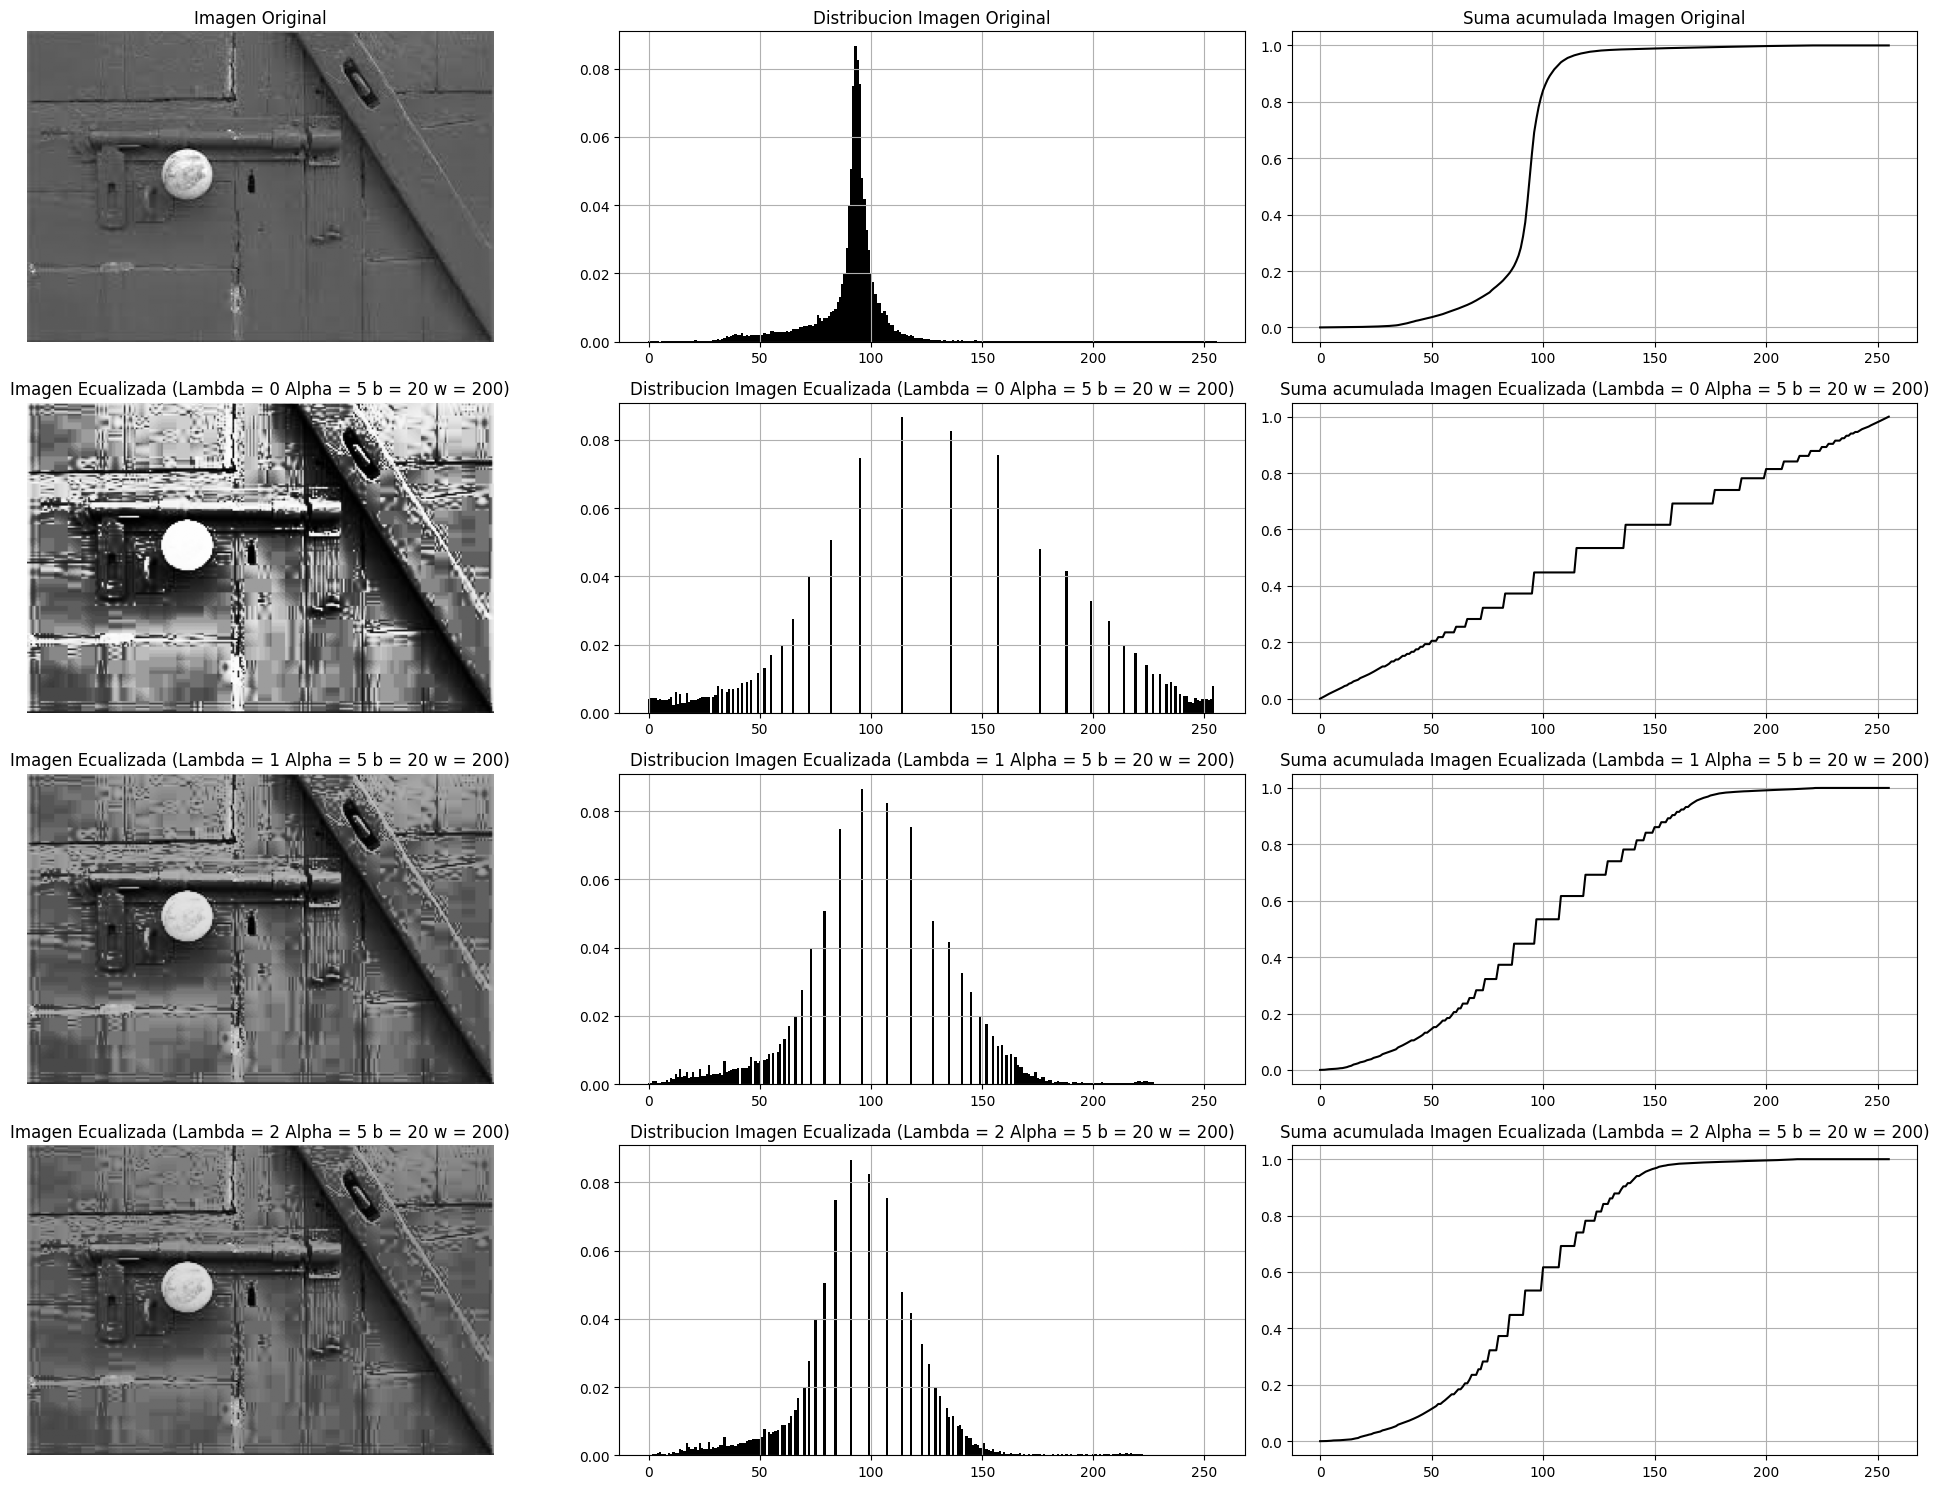

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, io, exposure, data

# Devuelve una matriz diagona con 1 en [0, b] y [w, 255]
def matrizEstiramiento(b, w):
  diagonal = np.zeros(256)
  diagonal[:b+1] = 1
  diagonal[w:256] = 1
  return np.diag(diagonal, 0)


def bwEstiramiento(imagen, lambdaArg, alphaArg, b, w):
  #COMPLETAR
  h0 = distribucionImagen(imagen)
  u  = distribucionUniforme()
  IB = matrizEstiramiento(b, w)
  I = np.eye(256)
  h_moño = np.linalg.inv((1+ lambdaArg)*I + alphaArg*IB)@(h0+lambdaArg*u)
  imagenEcualizada = ecualizarImagen(imagen.copy(), h_moño)
  return imagenEcualizada

imagenPocoContraste = util.img_as_ubyte(io.imread("/content/imagenes/door.jpeg", as_gray=True))
imagenEcualizadaLabmda_0 =  bwEstiramiento(imagenPocoContraste, 0, 5, 20, 200)
imagenEcualizadaLabmda_1 =  bwEstiramiento(imagenPocoContraste, 1, 5, 20, 200)
imagenEcualizadaLabmda_2 =  bwEstiramiento(imagenPocoContraste, 2, 5, 20, 200)

fig, axs = plt.subplots(4,3, figsize=(20,15))
axs = axs.ravel()


mostrarImagenConDistribucion(axs, 0, imagenPocoContraste, "Imagen Original")
mostrarImagenConDistribucion(axs, 3, imagenEcualizadaLabmda_0, "Imagen Ecualizada (Lambda = 0 Alpha = 5 b = 20 w = 200)")
mostrarImagenConDistribucion(axs, 6, imagenEcualizadaLabmda_1, "Imagen Ecualizada (Lambda = 1 Alpha = 5 b = 20 w = 200)")
mostrarImagenConDistribucion(axs, 9, imagenEcualizadaLabmda_2, "Imagen Ecualizada (Lambda = 2 Alpha = 5 b = 20 w = 200)")

plt.tight_layout()
plt.show()

### ***Consigna Final:***
Reflexionen sobre las posibles aplicaciones de este marco de modificación de histograma en contextos del mundo real. ¿En qué tipos de imágenes o escenarios sería más beneficioso aplicar estas técnicas de mejora de contraste? Consideren tanto aplicaciones generales como específicas (por ejemplo, imágenes médicas, imágenes satelitales, etc.).


#### ***Respuesta***:
Dentro del contexto del mundo real, la modificación del histograma tiene aplicaciones tanto generales como específicas.

Una aplicación general es, por ejemplo, mejorar la visibilidad en fotografías digitales del día a día, especialmente en aquellas que se toman en un lugar donde la iluminación es baja. También en el caso de los sistemas de vigilancia donde las cámaras toman fotografías en condiciones de baja iluminación, la mejora del contraste es un instrumento clave para hacer más fácil la identificación de objetos o personas.

Por otro lado, se pueden aplicar en contextos más específicos. Por ejemplo, esta tecnica sirve en el analisis de imágenes satelitales donde permiten resaltar ríos, carreteras, entre otras cosas. También resulta muy util para mejorar el contraste en fotografías históricas  que fueron tomadas con cámaras antiguas, de modo que se mejora la calidad de la imagen pudiéndose apreciar detalles que antes no se podian ver.

### ***Consigna Final:***

Elijan una o un conjunto de imágenes que representen una de las posibles aplicaciones que desarrollaron en el punto anterior. A continuación, creen una visualización para comprobar qué tan efectiva es cada técnica en el caso de uso. Indiquen cuál de las tres técnicas produjo el mejor resultado y justifiquen su elección.

\

❗❗❗❗**Suban las imagenes a la entrega**❗❗❗❗

In [ ]:
# COMPLETAR

COMPLETAR